# Introduction...

# 1. Flux Balance Analysis Process using Cobra Overview

## 1.1  Cobra FBA of _E. coli's_ Metabolism


Experiment ID: 68536aef-7b0b-11eb-b46e-f834416ad528
Created: 03/01/2021 at 19:57:29
Completed in 1.26 seconds


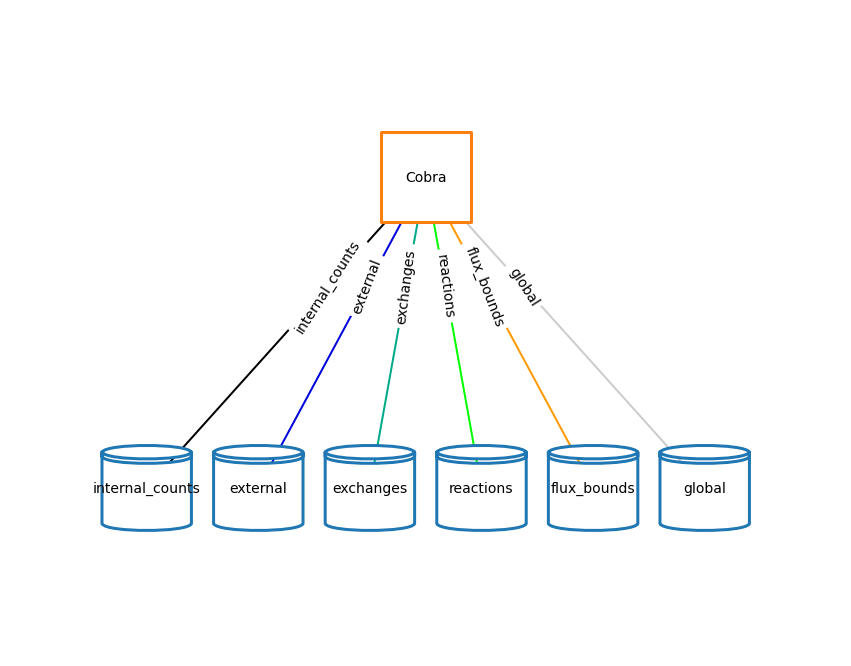

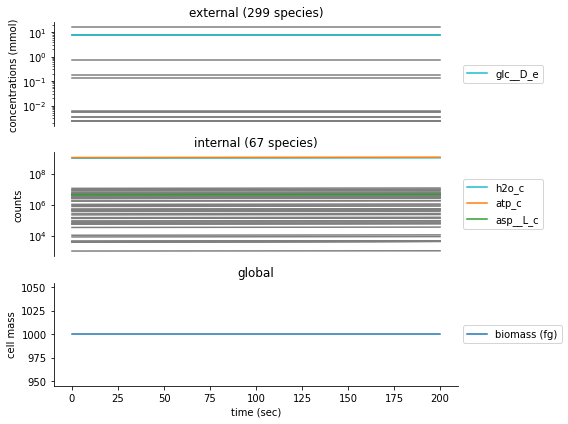

In [1]:
from bioscrape_cobra.simulate import simulate_cobra
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

cobra_timeseries, cobra = simulate_cobra(total_time = 200)

fig_topology = plot_topology(cobra)
fig_timeseries = plot_metabolism(cobra_timeseries)

## 1.2 Adding a Derivers to Update Biomass and Volume


Experiment ID: 6ed15ac7-7b0b-11eb-a1cd-f834416ad528
Created: 03/01/2021 at 19:57:39
Completed in 3.58 seconds


C:\Users\wp_ix\miniconda3\lib\site-packages\bioscrape_cobra-0.0.1-py3.8.egg\bioscrape_cobra\plot.py:186: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(grid[2, 0])


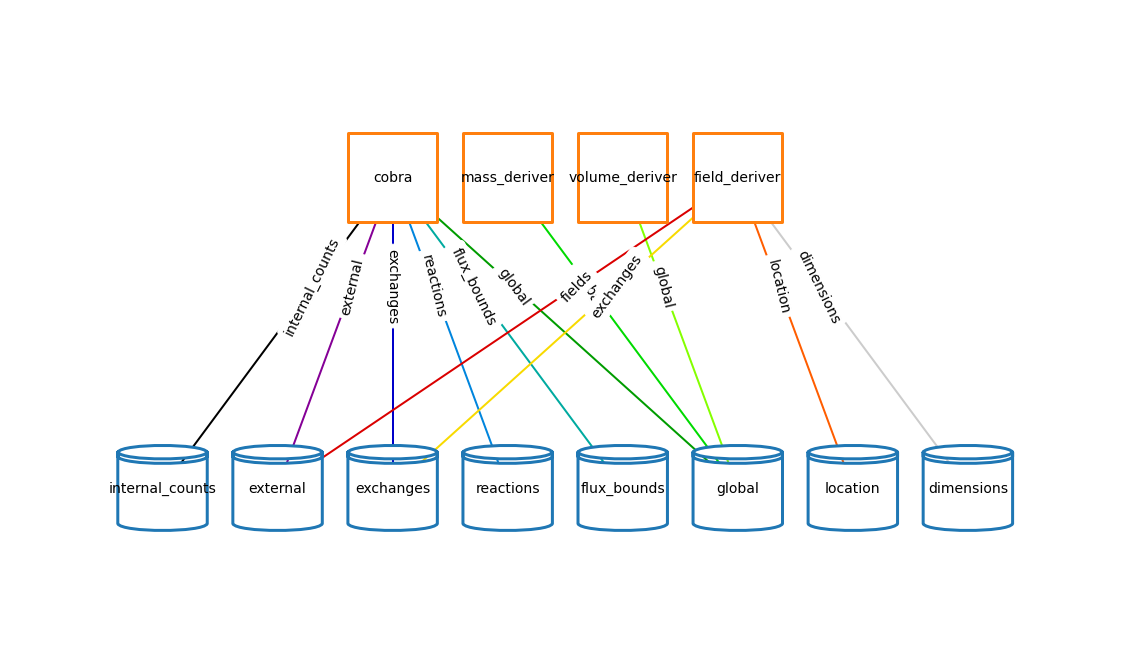

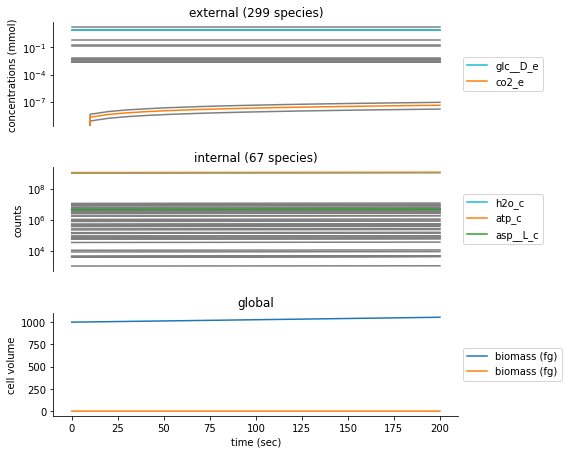

In [2]:
from bioscrape_cobra.simulate import simulate_cobra_composite
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

cobra_timeseries, cobra_composite = simulate_cobra_composite(total_time = 200)

fig_topology = plot_topology(cobra_composite)
fig_timeseries = plot_metabolism(cobra_timeseries)

# 2. Chemical Reaction Networks with Bioscrape Overview

## 2.1 A Deterministic Bioscrape Simulation of the Lac Operon CRN


Experiment ID: 73eef943-7b0b-11eb-a2eb-f834416ad528
Created: 03/01/2021 at 19:57:48
Completed in 0.279579 seconds


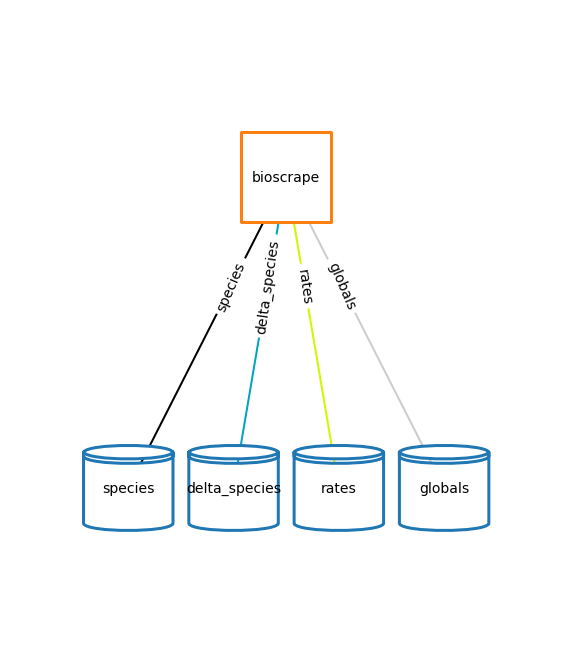

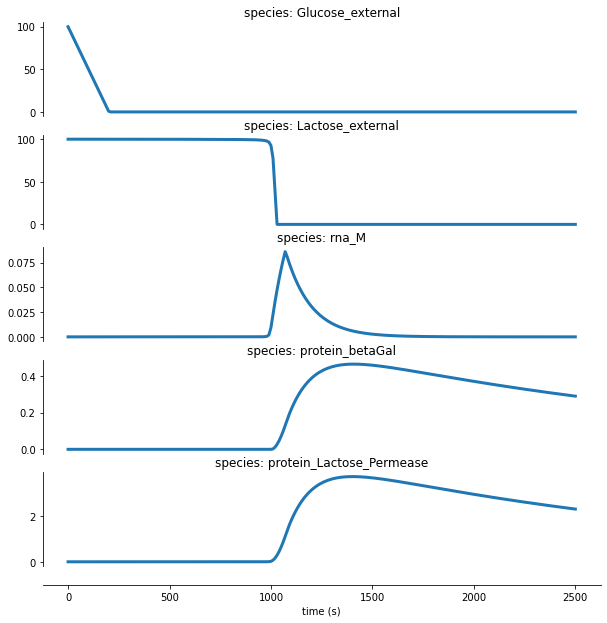

In [3]:
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

bioscrape_timeseries, bioscrape_composite = simulate_bioscrape(total_time = 2500, initial_glucose = 100, initial_lactose = 100)

fig_topology = plot_topology(bioscrape_composite)
fig_timeseries = plot_single(
    bioscrape_timeseries, 
    variables =  [('species', 'Glucose_external'), ('species', 'Lactose_external'), ('species', 'rna_M'), ('species', 'protein_betaGal'),('species', 'protein_Lactose_Permease')]
)

## 2.2 A Deterministic Bioscrape Simulation of the Lac Operon CRN


Experiment ID: 7491cb2c-7b0b-11eb-9fd1-f834416ad528
Created: 03/01/2021 at 19:57:49
Completed in 3.04 seconds


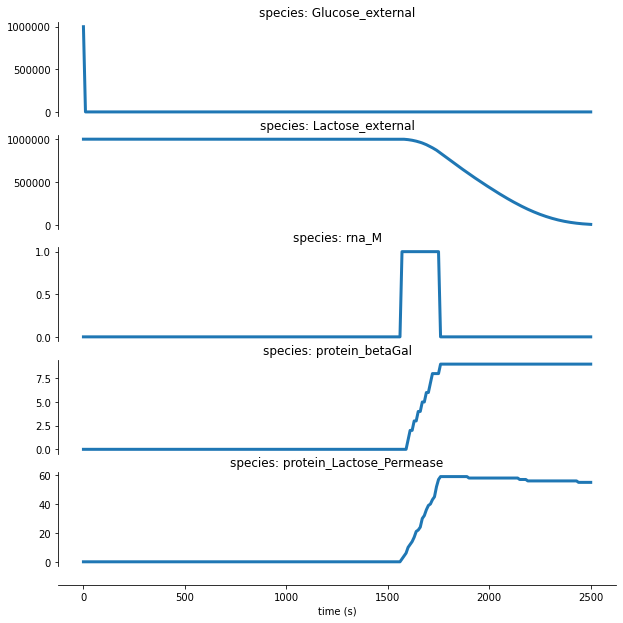

In [4]:
bioscrape_timeseries, bioscrape_composite = simulate_bioscrape(total_time = 2500, stochastic = True, initial_glucose = 10**6, initial_lactose = 10**6)

fig_timeseries = plot_single(
    bioscrape_timeseries, 
    variables =  [('species', 'Glucose_external'), ('species', 'Lactose_external'), ('species', 'rna_M'), ('species', 'protein_betaGal'),('species', 'protein_Lactose_Permease')]
)

# 3. Multibody and Spatial Simulations

## 3.1 Growing and Dividing Cells


Experiment ID: 76b53421-7b0b-11eb-ad14-f834416ad528
Created: 03/01/2021 at 19:57:53
Completed in 0.599476 seconds


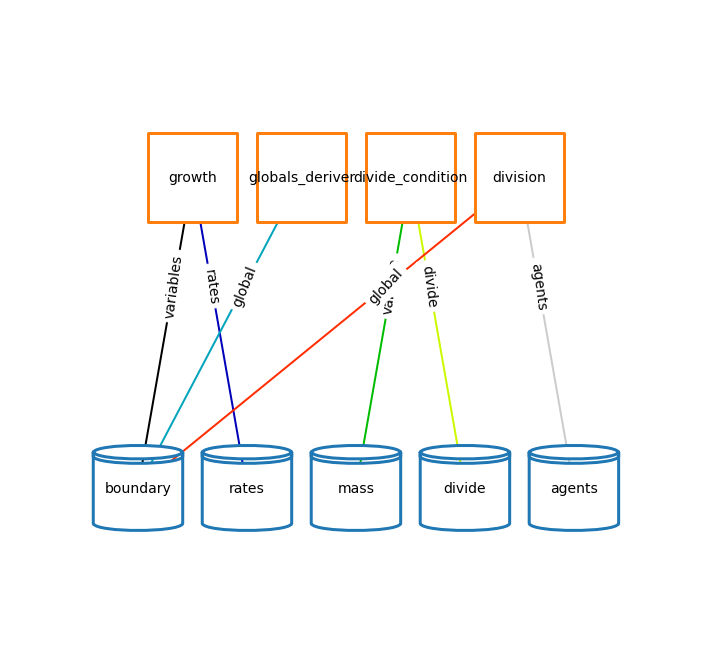

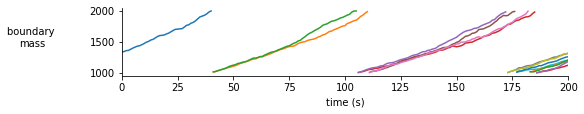

In [5]:
from bioscrape_cobra.simulate import simulate_grow_divide
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_multigen

grow_divide_timeseries, grow_divide_composite = simulate_grow_divide(total_time = 200, growth_rate = .01, growth_noise = .005)

fig_topology = plot_topology(grow_divide_composite)

fig_trajectories = plot_multigen(grow_divide_timeseries, variables = [("boundary", "mass")])

## 3.2 A Lattice Model of Diffusion

In [30]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_diffusion
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_tags, format_snapshot_data
import numpy as np
import matplotlib as plt

N = 10
bounds = [N, N]
initial_state = np.zeros((N, N))
initial_state[3, 3] = 10
diffusion_data, diffusion_composite = simulate_diffusion(total_time = 10, initial_state = initial_state, bounds = bounds)

print(diffusion_composite.processes.parameters)

print(diffusion_data)

fig_topology = plot_topology(diffusion_composite)

#plot_fields(diffusion_data, bounds = bounds, tagged_molecules = ["glc"])


agents, fields = format_snapshot_data(diffusion_data)

print(fields.keys())
tags_data = {
        'agents': {},
        'fields': fields,
        'config': {'bounds': bounds}}
tags_config = {
    'tagged_molecules': ["glc"],
    'n_snapshots': 2,
    'out_dir': None,
    'filename': None}
        
fig2 = plot_tags(
    data=tags_data,
    plot_config=tags_config)



Experiment ID: 9a76c7b6-7b0d-11eb-80ea-f834416ad528
Created: 03/01/2021 at 20:13:12
Completed in 0.026644 seconds
{'time_step': 1, 'molecules': ['glc'], 'initial_state': {'glc': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])}, 'n_bins': [10, 10], 'bounds': [10, 10], 'depth': 3000.0, 'diffusion': 0.001, 'gradient': {}}


{0.0: {'fields': {'glc': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}, 'dimensions': {'bounds': [10, 10], 'n_bins': [10, 10], 'depth': 3000.0}, 'agents': {}}, 1.0: {'fields': {'glc': [[2.3762747560182137e-19, 7.501981737311188e-16, 1.56285450665213e-12, 1.6111305658435519e-09, 1.56285450665213e-12, 7.501981737207335e-16, 2.3757164417463713e-19, 5.583142718421317e-23, 1.0385034525241294e-26, 1.5926386583673333e-30], [7.501981737311188e-16, 2.3437190668220695e-12, 4.832217962448443e-09, 4.93063984561311e-06, 4.83221796

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])


IndexError: list index out of range

# 4. Connecting Bioscrape and Cobra in an Ensemble of Growing, Dividing Cells on a 2D Lattice

In [7]:
# Show full topology here
